Watch: https://www.youtube.com/watch?v=XyX5HNuv-xE for tutorial video

In [3]:
# https://youtu.be/XyX5HNuv-xE
"""
Author: Dr. Sreenivas Bhattiprolu

Multiclass semantic segmentation using U-Net

Including segmenting large images by dividing them into smaller patches 
and stiching them back

To annotate images and generate labels, you can use APEER (for free):
www.apeer.com 
"""

from simple_multi_unet_model import multi_unet_model #Uses softmax 

from keras.utils import normalize
import os
import glob
!pip install opencv-python
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [4]:
# set up the working directory to the chosen directory (raw string input), i.e., where the dataset is located
abs_path_loading_images=r'/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/training/images_small'
abs_path_loading_masks=r'/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/training/masks_small'
abs_path_save_model = r'/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/z_tryout'

In [5]:
#Resizing images, if needed
SIZE_X = 352 
SIZE_Y = 352
n_classes=8 #Number of classes for segmentation

In [9]:
# Set the working directory to the location of the mscl-log
os.chdir(abs_path_loading_images)

# Print the current working directory to verify that it's set to the desired location.
print(os.getcwd())

# List all jpg files in the current working directory.
files_dir = [file for file in os.listdir(os.getcwd()) if file.endswith('.png')]

# Quality control: Print the list of files and directories in the current working directory
print(files_dir)

/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/training/images_small
['BASA1_072_2_A_4.png', 'BASA1_195_2_A_3.png', 'BASA1_052_1_A_6.png', 'BASA1_200_3_A_4.png', 'BASA1_037_1_A_2.png', 'BASA1_009_1_A_7.png', 'BASA1_096_1_A_5.png', 'BASA1_199_1_A_3.png', 'BASA1_089_1_A_1.png', 'BASA1_170_2_A_1.png', 'BASA1_028_1_A_6.png', 'BASA1_152_2_A_8.png', 'BASA1_025_1_A_5.png', 'BASA1_084_1_A_2.png', 'BASA1_163_1_A_5.png', 'BASA1_067_1_A_7.png', 'BASA1_031_1_A_5.png', 'BASA1_076_1_A_8.png', 'BASA1_192_1_A_7.png', 'BASA1_082_1_A_5.png', 'BASA1_215_1_A_2.png', 'BASA1_183_1_A_8.png', 'BASA1_218_1_A_1.png', 'BASA1_148_2_A_3.png', 'BASA1_168_1_A_1.png', 'BASA1_078_1_A_3.png', 'BASA1_078_1_A_2.png', 'BASA1_168_1_A_0.png', 'BASA1_148_2_A_2.png', 'BASA1_218_1_A_0.png', 'BASA1_215_1_A_3.png', 'BASA1_082_1_A_4.png', 'BASA1_192_1_A_6.png', 'BASA1_031_1_A_4.png', 'BASA1_067_1_A_6.png', 'BASA1_163_1_A_4.png', 'BASA1_084_1_A_3.png', 'BASA1_025_1_A_4.png', 'BASA1_028_1_A_7.png', 'BASA1_170_2_A_0.png',

In [10]:
# Initialize a zeroes list to store loaded images
image_loaded = [0] * len(files_dir)

# Quality control: Print the initialized list
#print(image_loaded)

# Iterate over the list of file names
for i in range(len(image_loaded)):
    # Load an image from a file specified by the file directory
    image = io.imread(files_dir[i])
    # 'io.imread' reads an image from the specified file path and returns it as an ndarray.
    
    # Quality control: Print the shape of the loaded image
    #print(image.shape)
    
    # Store the loaded image in the list of loaded images
    image_loaded[i] = image

# Convert the list of loaded images to a NumPy array
train_images = np.array(image_loaded)

#Capture training image info as a list
train_images = []

for directory_path in glob.glob(r"C:\Users\User\Desktop\test\pictures_smal"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0)       
        #img = cv2.resize(img, (SIZE_Y, SIZE_X))
        train_images.append(img)
       
#Convert list to array for machine learning processing        
train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob(r"C:\Users\User\Desktop\test\masks_small"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
        train_masks.append(mask)
        
#Convert list to array for machine learning processing          
train_masks = np.array(train_masks)

In [11]:
# Set the working directory to the location of the mscl-log
os.chdir(abs_path_loading_masks)

# Print the current working directory to verify that it's set to the desired location.
print(os.getcwd())

# List all .tif files in the current working directory
files_dir = [file for file in os.listdir(os.getcwd()) if file.endswith('.tif')]

# Quality control: Print the list of files and directories in the current working directory
print(files_dir)

# Initialize a list to store loaded masks
mask_loaded = [0] * len(files_dir)

# Quality control: Print the initialized list
print(mask_loaded)

# Iterate over the list of file names
for i in range(len(mask_loaded)):
    # Load a mask image from a file specified by the file directory
    mask = io.imread(files_dir[i])
    
    # Print the shape of the loaded mask image
    print(mask.shape)
    
    # Store the loaded mask image in the list of loaded masks
    mask_loaded[i] = mask
    
    # Print the index of the current mask being processed
    print(i)

# Convert the list of loaded masks to a NumPy array
train_masks = np.array(mask_loaded)

# Print the shape of the NumPy array of loaded masks
print(train_masks.shape)

# Count unique values in the loaded mask array and print the results
print(np.unique(train_masks, return_counts=True))

/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/training/masks_small
['BASA1_227_1_A__1_mask.tif', 'BASA1_227_1_A__0_mask.tif', 'BASA1_088_1_A__1_mask.tif', 'BASA1_088_1_A__0_mask.tif', 'BASA1_151_1_A__5_mask.tif', 'BASA1_151_1_A__4_mask.tif', 'BASA1_181_1_A__7_mask.tif', 'BASA1_122_2_A__8_mask.tif', 'BASA1_181_1_A__6_mask.tif', 'BASA1_172_2_A__5_mask.tif', 'BASA1_172_2_A__4_mask.tif', 'BASA1_068_1_A__6_mask.tif', 'BASA1_068_1_A__7_mask.tif', 'BASA1_200_1_A__8_mask.tif', 'BASA1_069_1_A__1_mask.tif', 'BASA1_069_1_A__0_mask.tif', 'BASA1_009_1_A__8_mask.tif', 'BASA1_089_1_A__6_mask.tif', 'BASA1_089_1_A__7_mask.tif', 'BASA1_084_1_A__3_mask.tif', 'BASA1_084_1_A__2_mask.tif', 'BASA1_158_2_A__8_mask.tif', 'BASA1_160_1_A__7_mask.tif', 'BASA1_160_1_A__6_mask.tif', 'BASA1_036_1_A__6_mask.tif', 'BASA1_036_1_A__7_mask.tif', 'BASA1_132_1_A__5_mask.tif', 'BASA1_199_1_A__1_mask.tif', 'BASA1_199_1_A__0_mask.tif', 'BASA1_132_1_A__4_mask.tif', 'BASA1_219_1_A__8_mask.tif', 'BASA1_071_1_A__7_mas

In [12]:
###############################################
#Encode labels... but multi dim array so need to flatten, encode and reshape

# Import necessary library
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder object
labelencoder = LabelEncoder()

# Get the shape of the training masks array
n, h, w = train_masks.shape

# Flattening: Reshape the 3D array into a one-column 2D array, then flatten it to a 1D array.
train_masks_reshaped = train_masks.reshape(-1, 1).flatten()

# Print the shape of the flattened array
print(train_masks_reshaped.shape)

# Encode the flattened array of training masks using LabelEncoder
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
# 'fit_transform' fits the LabelEncoder to the data and transforms it, encoding each unique value with a unique integer.

# Reshape the encoded array back to its original shape
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
# Reshape the 1D encoded array back to the original 3D shape.

# Print the shape of the encoded array
print(train_masks_reshaped_encoded.shape)

# Print the unique values in the encoded array
print(np.unique(train_masks_encoded_original_shape))
# Print the unique values in the array to check the encoding.

(83263488,)
(83263488,)
[0 1 2 3 4 5 6 7]


In [13]:
print(train_images.shape,train_images.ndim)
print(train_masks.shape,train_masks.ndim)


(672, 352, 352) 3
(672, 352, 352) 3


In [14]:
#################################################
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks, axis=3)
print(train_masks_input.shape,train_masks_input.ndim)

print(train_images.shape,train_images.ndim)

(672, 352, 352, 1) 4
(672, 352, 352, 1) 4


In [27]:
### Assigning randomly selected training and testing datasets for model run. Comment out if using next block.

# Import necessary library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# test_size = 0.10 means 10% of the data will be used for testing, and the rest for training
# random_state = 0 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks_input, test_size=0.10, random_state=0)

# Print the shapes of the datasets for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Print the unique class values in the training dataset
print("Class values in the dataset are ... ", np.unique(y_train))
# 0 typically represents background or unlabeled regions.

# Import necessary library
from keras.utils import to_categorical

# Convert the integer labels to one-hot encoded format for training data
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
# 'to_categorical' converts class vector (integers) to binary class matrix.

# Reshape the one-hot encoded labels to match the shape of the training labels
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

# Convert the integer labels to one-hot encoded format for testing data
test_masks_cat = to_categorical(y_test, num_classes=n_classes)

# Reshape the one-hot encoded labels to match the shape of the testing labels
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

# Print the shape of the one-hot encoded training labels
print(train_masks_cat.shape)


X_train shape: (604, 352, 352, 1)
y_train shape: (604, 352, 352, 1)
X_test shape: (68, 352, 352, 1)
y_test shape: (68, 352, 352, 1)
Class values in the dataset are ...  [0 1 2 3 4 5 6 7]
(604, 352, 352, 8)


In [31]:
### Assigning specific training and testing datasets for model run. Comment out if using previous block. 

# Specify the directories where your training and testing datasets are stored
train_images_dir = "/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/training/images_small"
train_masks_dir = "/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/training/masks_small"
test_images_dir = "/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/test/images_small"
test_masks_dir = "/Users/pbecerra/CAS/ADS_course/Module6/project/image_data/test/masks_small"

# Load training images and masks
X_train = []
y_train = []
for filename in os.listdir(train_images_dir):
    if filename.endswith('.png'):  # Assuming images are in png format
        # Load the image
        image = io.imread(os.path.join(train_images_dir, filename))
        # If image is grayscale, add a channel dimension
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)
        # Append the image to the list of training images
        X_train.append(image)
        # Load the corresponding mask
        mask_filename = filename.split('.')[0] + '_mask.tif'  # Assuming mask filenames are derived from image filenames
        mask = io.imread(os.path.join(train_masks_dir, mask_filename))
        # If mask is grayscale, add a channel dimension
        if len(mask.shape) == 2:
            mask = np.expand_dims(mask, axis=-1)
        # Append the mask to the list of training masks
        y_train.append(mask)

# Load testing images and masks
X_test = []
y_test = []
for filename in os.listdir(test_images_dir):
    if filename.endswith('.png'):  # Assuming images are in png format
        # Load the image
        image = io.imread(os.path.join(test_images_dir, filename))
        # If image is grayscale, add a channel dimension
        if len(image.shape) == 2:
            image = np.expand_dims(image, axis=-1)
        # Append the image to the list of testing images
        X_test.append(image)
        # Load the corresponding mask
        mask_filename = filename.split('.')[0] + '_mask.tif'  # Assuming mask filenames are derived from image filenames
        mask = io.imread(os.path.join(test_masks_dir, mask_filename))
        # If mask is grayscale, add a channel dimension
        if len(mask.shape) == 2:
            mask = np.expand_dims(mask, axis=-1)
        # Append the mask to the list of testing masks
        y_test.append(mask)

# Convert the lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Print the shapes of the datasets for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Print the unique class values in the training dataset
print("Class values in the dataset are ... ", np.unique(y_train))
# 0 typically represents background or unlabeled regions.

# Import 'to_categorical' from keras.utils. This function converts a class vector (integers) to a binary class matrix.
from keras.utils import to_categorical

# Convert the integer labels to one-hot encoded format for training data
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
# 'to_categorical' converts class vector (integers) to binary class matrix.

# Reshape the one-hot encoded labels to match the shape of the training labels
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

# Convert the integer labels to one-hot encoded format for testing data
test_masks_cat = to_categorical(y_test, num_classes=n_classes)

# Reshape the one-hot encoded labels to match the shape of the testing labels
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

# Print the shape of the one-hot encoded training labels
print(train_masks_cat.shape)
print(test_masks_cat.shape)

X_train shape: (672, 352, 352, 1)
y_train shape: (672, 352, 352, 1)
X_test shape: (95, 352, 352, 1)
y_test shape: (95, 352, 352, 1)
Class values in the dataset are ...  [0 1 2 3 4 5 6 7]
(672, 352, 352, 8)
(95, 352, 352, 8)


In [32]:
print(train_masks_reshaped_encoded.shape)

(83263488,)


In [33]:
###############################################################
from sklearn.utils import class_weight

# Compute class weights based on the distribution of class labels in the dataset
# The "balanced" mode automatically adjusts weights inversely proportional to class frequencies in the input data
class_weights = class_weight.compute_class_weight(class_weight="balanced",
                                                  classes=np.unique(train_masks_reshaped_encoded),
                                                  y=train_masks_reshaped_encoded)
# 'np.unique(train_masks_reshaped_encoded)' returns unique class labels present in the dataset.
# 'train_masks_reshaped_encoded' contains the encoded class labels.
# 'class_weight.compute_class_weight' computes class weights based on the distribution of class labels.
# The "balanced" mode adjusts weights inversely proportional to class frequencies.

# Print the computed class weights
print("Class weights are...:", class_weights)
# Print the computed class weights to show how much weight each class should receive during training.

Class weights are...: [0.41790672 0.84635036 4.80718533 2.26319994 3.07870445 0.48430704
 1.00307961 2.56966405]


In [34]:
# Create a dictionary where keys are unique class labels and values are corresponding class weights
dict_test = {A: B for A, B in zip(np.unique(train_masks_reshaped_encoded), class_weights)}
# 'zip' pairs each unique class label with its corresponding class weight.
# The dictionary comprehension creates a dictionary with class labels as keys and class weights as values.

# Print the created dictionary to show the mapping of class labels to their corresponding class weights.
print(dict_test)

{0: 0.41790672254958716, 1: 0.8463503599775953, 2: 4.807185326724799, 3: 2.263199942593346, 4: 3.0787044514293522, 5: 0.48430703859082536, 6: 1.003079612127315, 7: 2.5696640504060184}


In [36]:
# Get the dimensions of the input images
IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

# Define a function to get the segmentation model
def get_model():
    # Return a segmentation model initialized with the specified input dimensions and number of classes
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

# Create the segmentation model
model = get_model()

# Compile the model
# 'adam' optimizer is used for gradient descent
# 'categorical_crossentropy' loss function is commonly used for multi-class classification problems
# 'accuracy' metric is used to evaluate the performance of the model during training
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture, including layer names, output shapes, and number of parameters
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 352, 352, 1)]        0         []                            
                                                                                                  
 conv2d_38 (Conv2D)          (None, 352, 352, 16)         160       ['input_3[0][0]']             
                                                                                                  
 dropout_18 (Dropout)        (None, 352, 352, 16)         0         ['conv2d_38[0][0]']           
                                                                                                  
 conv2d_39 (Conv2D)          (None, 352, 352, 16)         2320      ['dropout_18[0][0]']          
                                                                                            

In [37]:
print(y_train_cat.shape)

(672, 352, 352, 8)


In [15]:
# If starting with pre-trained weights.
# Load pre-trained weights from a HDF5 file if available
# model.load_weights('???.hdf5')

# Train the model
# Fit the model to the training data
# X_train: Input images for training
# y_train_cat: One-hot encoded labels for training
# batch_size: Number of samples per gradient update
# verbose: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch)
# epochs: Number of epochs to train the model
# validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch
# shuffle: Whether to shuffle the training data before each epoch
history = model.fit(X_train, y_train_cat, 
                    batch_size=16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test_cat), 
                    #class_weight=class_weights,
                    shuffle=False)

# Save the trained model
# Set the working directory to the location specified by abs_path_save_model
os.chdir(abs_path_save_model)
# Get the current working directory
os.getcwd()
# Save the trained model to a HDF5 file
model.save('my_model_test_1.keras')
# Save the trained model with a specific filename
# model.save('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')


Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.2592 - loss: 1.9762 - val_accuracy: 0.2734 - val_loss: 1.7589
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.3503 - loss: 1.6570 - val_accuracy: 0.5200 - val_loss: 1.4700
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4925 - loss: 1.4653 - val_accuracy: 0.5212 - val_loss: 1.4083
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.4931 - loss: 1.4375 - val_accuracy: 0.5289 - val_loss: 1.3617
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5044 - loss: 1.3856 - val_accuracy: 0.5354 - val_loss: 1.3198
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5112 - loss: 1.3461 - val_accuracy: 0.5368 - val_loss: 1.3212
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.5067 - loss: 1.3767 - val_accuracy: 0.5472 - val_loss: 1.2781
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5296 - loss: 1.2919 - val_accuracy: 0.5449 - val_loss:

In [79]:
print(history.history['accuracy'])

[0.27367252111434937, 0.41160184144973755, 0.5041158199310303, 0.5078868865966797, 0.5183765888214111, 0.5266830921173096, 0.5241835713386536, 0.5585644245147705, 0.5457650423049927, 0.5909538269042969, 0.6099395751953125, 0.6200754642486572, 0.6281527876853943, 0.6362007260322571, 0.6407695412635803, 0.6427192687988281, 0.6473177075386047, 0.6486238837242126, 0.6476211547851562, 0.6478208303451538, 0.6440414190292358, 0.6486433148384094, 0.6512091159820557, 0.6543068289756775, 0.6558345556259155, 0.657089352607727, 0.6626993417739868, 0.6649395227432251, 0.669928252696991, 0.6752990484237671, 0.6770840883255005, 0.678948700428009, 0.6762161254882812, 0.6791663765907288, 0.6832108497619629, 0.6858271956443787, 0.687567412853241, 0.6916809678077698, 0.6978126764297485, 0.7026817202568054, 0.7041108012199402, 0.7051987648010254, 0.7042976021766663, 0.7077154517173767, 0.7154878973960876, 0.7218152284622192, 0.7219280004501343, 0.7164390087127686, 0.7171118259429932, 0.7258462309837341]


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 0.7010 - loss: 0.7980
Accuracy is =  69.81949210166931 %


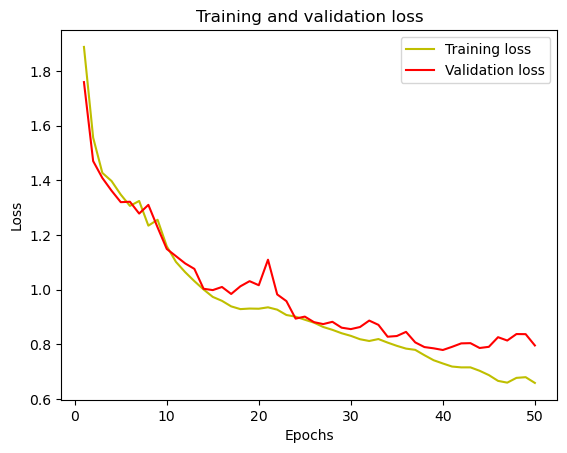

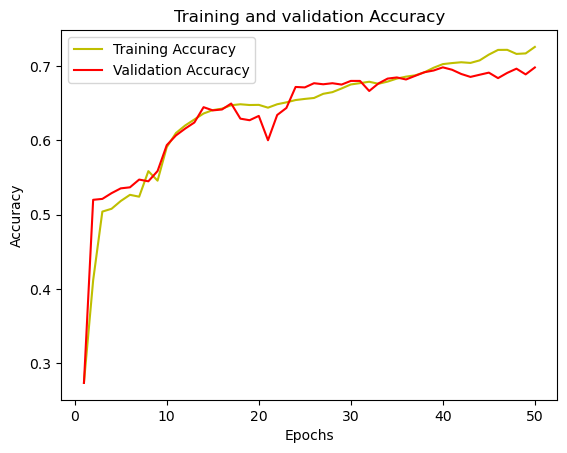

In [85]:
############################################################
#Evaluate the model
	# evaluate model
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
##################################
#model = get_model()
model.load_weights('my_model_test_1.keras')  
#model.load_weights('sandstone_50_epochs_catXentropy_acc_with_weights.hdf5')  

#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

##################################################

#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 8
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 94 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step
Mean IoU = 0.40860003


In [82]:
from keras.metrics import IoU

In [83]:
#To calculate I0U for each class...

#values = np.array(IOU_keras.add_weight()).reshape(n_classes, n_classes)
#values = np.array(IOU_keras).reshape(n_classes, n_classes)
#print(values)

In [86]:
iou_classe = []
for i in range(n_classes):
    m = IoU(num_classes=n_classes, target_class_ids=[i])
    m.update_state(y_test[:,:,:,0], y_pred_argmax)
    iou_classe.append(m.result())
    
    print(f'iou of class {i} is:',m.result().numpy())

iou of class0 is: 0.935145
iou of class1 is: 0.571629
iou of class2 is: 0.24039087
iou of class3 is: 0.2236725
iou of class4 is: 0.43752888
iou of class5 is: 0.55649817
iou of class6 is: 0.2786671
iou of class7 is: 0.025268283


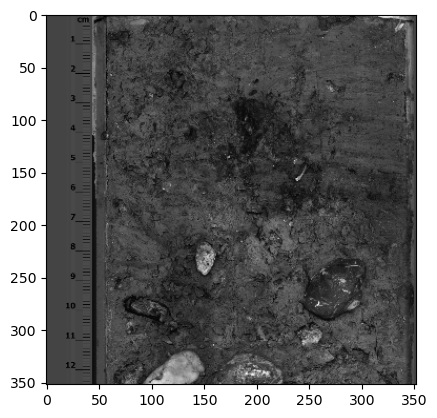

In [90]:
#class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
#class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
#class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
#class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

#print("IoU for class1 is: ", class1_IoU)
#print("IoU for class2 is: ", class2_IoU)
#print("IoU for class3 is: ", class3_IoU)
#print("IoU for class4 is: ", class4_IoU)

plt.imshow(train_images[0, :,:,0], cmap='gray')

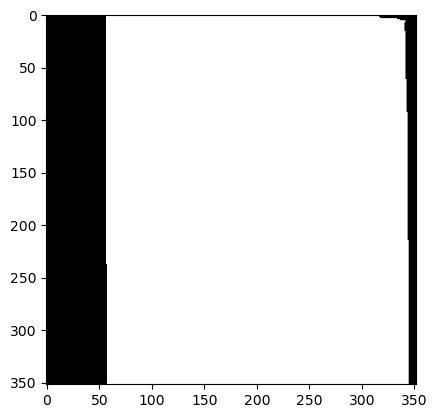

In [91]:
plt.imshow(train_masks[0], cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


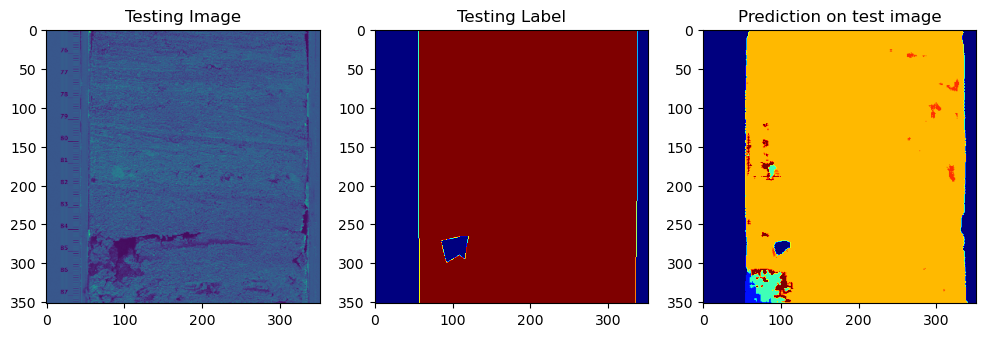

In [107]:
#######################################################################
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')  
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0])#, cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()

#####################################################################

#Predict on large image

#Apply a trained model on large image

from patchify import patchify, unpatchify

large_image = cv2.imread('large_images/large_image.tif', 0)
#This will split the image into small images of shape [3,3]
patches = patchify(large_image, (128, 128), step=128)  #Step=256 for 256 patches means no overlap

predicted_patches = []
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        print(i,j)
        
        single_patch = patches[i,j,:,:]       
        single_patch_norm = np.expand_dims(normalize(np.array(single_patch), axis=1),2)
        single_patch_input=np.expand_dims(single_patch_norm, 0)
        single_patch_prediction = (model.predict(single_patch_input))
        single_patch_predicted_img=np.argmax(single_patch_prediction, axis=3)[0,:,:]

        predicted_patches.append(single_patch_predicted_img)

predicted_patches = np.array(predicted_patches)

predicted_patches_reshaped = np.reshape(predicted_patches, (patches.shape[0], patches.shape[1], 128,128) )

reconstructed_image = unpatchify(predicted_patches_reshaped, large_image.shape)
plt.imshow(reconstructed_image, cmap='gray')
#plt.imsave('data/results/segm.jpg', reconstructed_image, cmap='gray')

plt.hist(reconstructed_image.flatten())  #Threshold everything above 0

# final_prediction = (reconstructed_image > 0.01).astype(np.uint8)
# plt.imshow(final_prediction)

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Large Image')
plt.imshow(large_image, cmap='gray')
plt.subplot(222)
plt.title('Prediction of large Image')
plt.imshow(reconstructed_image, cmap='jet')
plt.show()